In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set up environment and synthetic data generation
np.random.seed(42)  # to make this code example reproducible
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# True parameters and setup
theta_true = (4.0, 3.0)
x_1_orig = 2 * np.random.rand(500, 1)  # Max nsamp for consistency

def generate_data(nsamp, sig):
    """Generates synthetic data (x_1, y) with specified size and noise."""
    x_1 = x_1_orig[:nsamp]
    # y = theta_0 + theta_1 * x_1 + noise
    y = theta_true[0] + theta_true[1] * x_1 + sig * np.random.randn(nsamp, 1)
    return x_1, y

def calculate_loss(theta_0, theta_1, x_1, y):
    """Calculates the loss function (half SSE) for a given theta pair."""
    y_pred = theta_0 + theta_1 * x_1
    loss = 0.5 * np.linalg.norm(y - y_pred)**2
    return loss

# Create the parameter grid
theta0_range = np.linspace(-2, 8, 50)
theta1_range = np.linspace(-2, 8, 50)
Theta0, Theta1 = np.meshgrid(theta0_range, theta1_range)

### 1. Contour Plot for Baseline Parameters
We use the baseline values: n_samp=500 and σ=5.0.

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/var/folders/_2/nk6wlh3d1wvbv_l2yw0rg8qw0000gn/T/ipykernel_55458/1381282938.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'Loss Contour (Baseline: $n={nsamp_base}$, $\sigma={sig_base}$)')


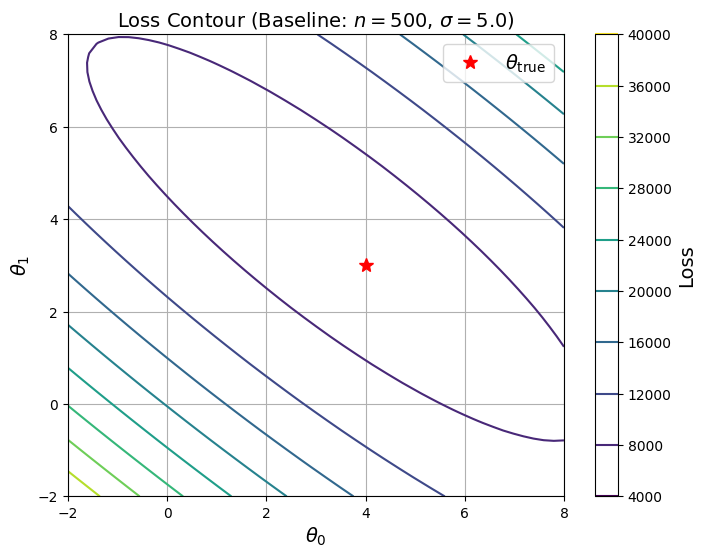

In [2]:
# Part 1: Baseline plot
nsamp_base = 500
sig_base = 5.0
x_1_base, y_base = generate_data(nsamp_base, sig_base)

# Calculate Loss across the grid
Loss_grid = np.array([calculate_loss(t0, t1, x_1_base, y_base) 
                      for t0, t1 in zip(np.ravel(Theta0), np.ravel(Theta1))]).reshape(Theta0.shape)

plt.figure(figsize=(8, 6))
contour = plt.contour(Theta0, Theta1, Loss_grid, levels=10, cmap='viridis')
plt.plot(theta_true[0], theta_true[1], 'r*', markersize=10, label=r'$\theta_{\text{true}}$')
plt.colorbar(contour, label='Loss')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title(f'Loss Contour (Baseline: $n={nsamp_base}$, $\sigma={sig_base}$)')
plt.legend()
plt.grid(True)
plt.show()

**Intuition:** The contour map shows a convex bowl shape (paraboloid), confirming that the MSE loss function for linear regression has a single global minimum. The concentric, elliptical contour lines (isolines of equal loss) center near the true parameter values $(θ_0=4.0,θ_1=3.0)$, indicating that the minimum loss is achieved by parameters close to the true model.

### 2. Effect of Varying n_samp
We repeat the contour plot for n_samp=20,50,100,250,  keeping σ=5.0 fixed.

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/var/folders/_2/nk6wlh3d1wvbv_l2yw0rg8qw0000gn/T/ipykernel_55458/4026414257.py:17: SyntaxWarning: invalid escape sequence '\m'
  axes[i].set_title(f'$n_{{\mathrm{{samp}}}} = {nsamp}$, $\sigma = {sig_fixed}$')
/var/folders/_2/nk6wlh3d1wvbv_l2yw0rg8qw0000gn/T/ipykernel_55458/4026414257.py:17: SyntaxWarning: invalid escape sequence '\s'
  axes[i].set_title(f'$n_{{\mathrm{{samp}}}} = {nsamp}$, $\sigma = {sig_fixed}$')


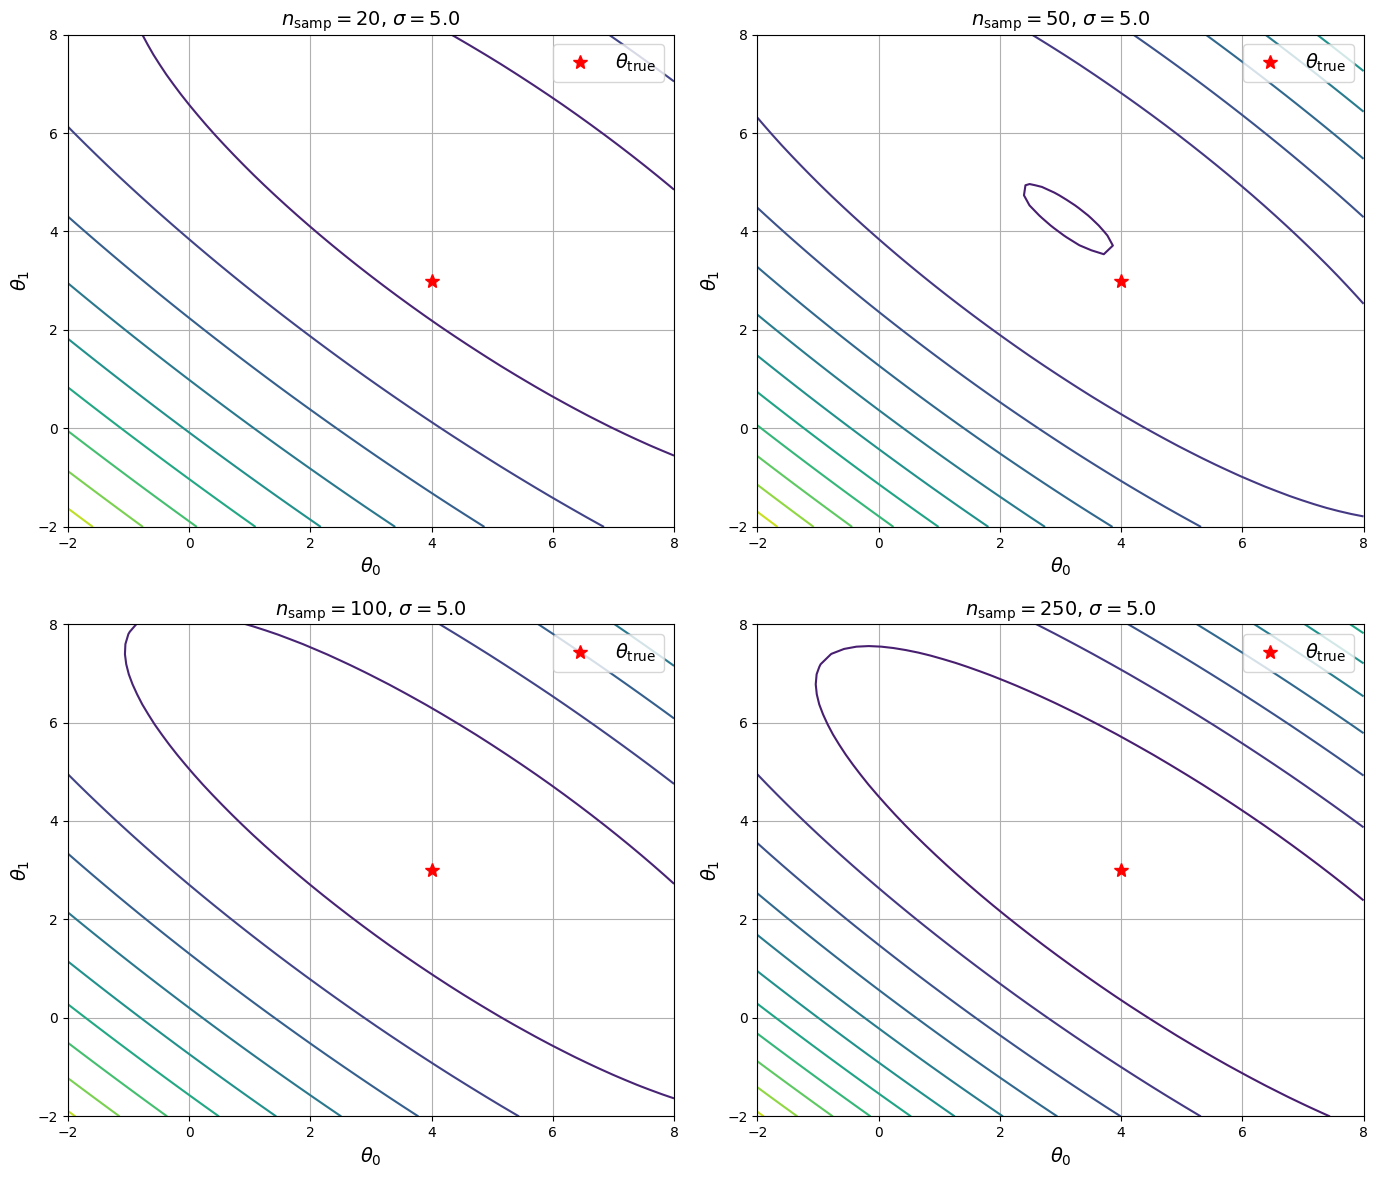

In [3]:
# Part 2: Varying nsamp
nsamp_values = [20, 50, 100, 250]
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()
sig_fixed = 5.0

for i, nsamp in enumerate(nsamp_values):
    x_1, y = generate_data(nsamp, sig_fixed)
    Loss_grid = np.array([calculate_loss(t0, t1, x_1, y)
                          for t0, t1 in zip(np.ravel(Theta0), np.ravel(Theta1))]).reshape(Theta0.shape)
    
    contour = axes[i].contour(Theta0, Theta1, Loss_grid, levels=10, cmap='viridis')
    axes[i].plot(theta_true[0], theta_true[1], 'r*', markersize=10, label=r'$\theta_{\text{true}}$')
    # fig.colorbar(contour, ax=axes[i], label='Loss') # Commented for cleaner plot
    axes[i].set_xlabel(r'$\theta_0$')
    axes[i].set_ylabel(r'$\theta_1$')
    axes[i].set_title(f'$n_{{\mathrm{{samp}}}} = {nsamp}$, $\sigma = {sig_fixed}$')
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()

**Conclusion on Varying n_samp**

As n_samp increases:

**Precision/Curvature:** The contour lines become tighter and more narrowly spaced around the minimum. This signifies that the loss function becomes steeper (higher curvature), meaning the parameters must be close to the optimal values for the loss to be low. This reflects higher confidence/precision in the estimated parameters.

**Minimum Location:** The location of the minimum of the loss function generally gets closer to θ_true=(4.0,3.0). With more data, the random noise is averaged out more effectively, providing a better estimate of the true underlying relationship.

### 3. Effect of Varying σ
We repeat the contour plot for σ=1,2.5,5,10, keeping n_samp=250 fixed.

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/var/folders/_2/nk6wlh3d1wvbv_l2yw0rg8qw0000gn/T/ipykernel_55458/3557511932.py:17: SyntaxWarning: invalid escape sequence '\m'
  axes[i].set_title(f'$n_{{\mathrm{{samp}}}} = {nsamp_fixed}$, $\sigma = {sig}$')
/var/folders/_2/nk6wlh3d1wvbv_l2yw0rg8qw0000gn/T/ipykernel_55458/3557511932.py:17: SyntaxWarning: invalid escape sequence '\s'
  axes[i].set_title(f'$n_{{\mathrm{{samp}}}} = {nsamp_fixed}$, $\sigma = {sig}$')


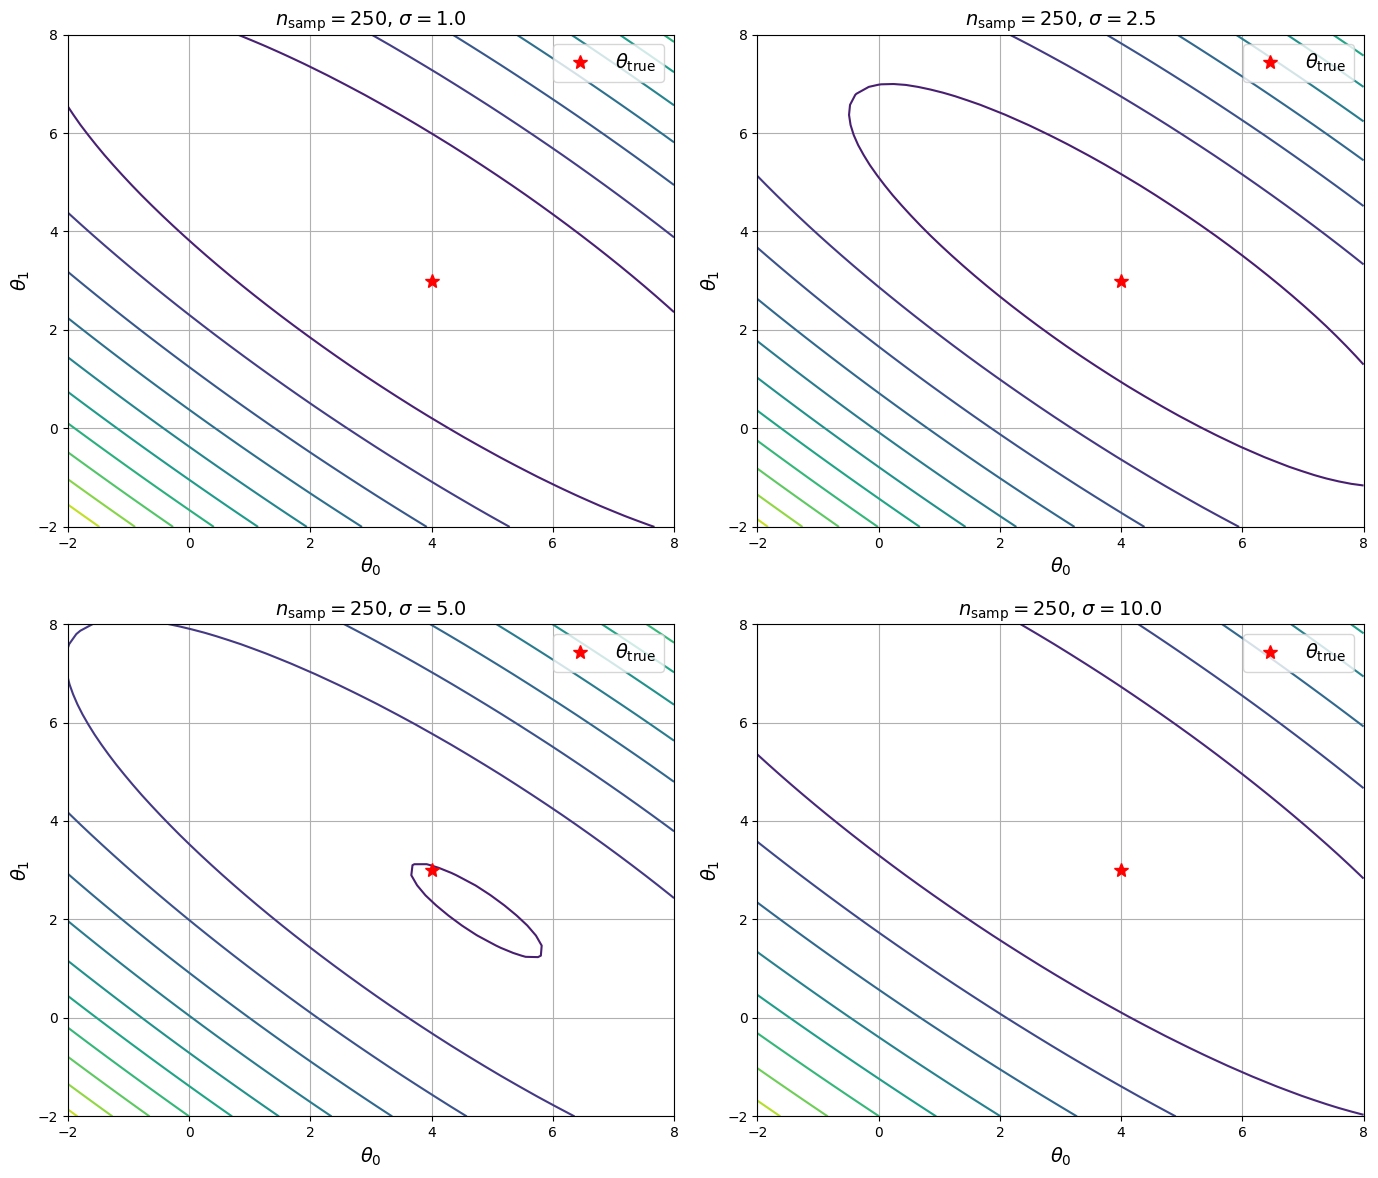

In [4]:
# Part 3: Varying sig
sig_values = [1.0, 2.5, 5.0, 10.0]
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()
nsamp_fixed = 250

for i, sig in enumerate(sig_values):
    x_1, y = generate_data(nsamp_fixed, sig)
    Loss_grid = np.array([calculate_loss(t0, t1, x_1, y)
                          for t0, t1 in zip(np.ravel(Theta0), np.ravel(Theta1))]).reshape(Theta0.shape)
    
    contour = axes[i].contour(Theta0, Theta1, Loss_grid, levels=10, cmap='viridis')
    axes[i].plot(theta_true[0], theta_true[1], 'r*', markersize=10, label=r'$\theta_{\text{true}}$')
    # fig.colorbar(contour, ax=axes[i], label='Loss') # Commented for cleaner plot
    axes[i].set_xlabel(r'$\theta_0$')
    axes[i].set_ylabel(r'$\theta_1$')
    axes[i].set_title(f'$n_{{\mathrm{{samp}}}} = {nsamp_fixed}$, $\sigma = {sig}$')

    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()

**Conclusion on Varying σ**

As σ (noise amplitude) increases:

**Precision/Curvature:** The contour lines become wider and more spread out. This signifies that the loss function becomes shallower (lower curvature), meaning a larger change in the parameters results in a smaller change in the loss. This reflects lower confidence/precision in the estimated parameters due to the high inherent noise.

**Minimum Loss Value:** The absolute value of the loss at the minimum significantly increases (note the colorbar scale would change dramatically). This is because the overall error is dominated by the large noise term.

**Minimum Location:** The location of the minimum of the loss function becomes more variable and potentially further from θ_true=(4.0,3.0) because the noise makes the true trend harder to isolate.